# Цель проекта

### Выявить преимущество Нейронных сетей перед моделями
### Подобрать дата сет
### Подести итоги 

# Подключение библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:

from tensorflow import keras

## Загружаем дата сет

In [3]:
df = pd.read_csv("text.csv")
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   Unnamed: 0  416809 non-null  int64
 1   text        416809 non-null  str  
 2   label       416809 non-null  int64
dtypes: int64(2), str(1)
memory usage: 9.5 MB


### Набор данных содержит 416 808 строк и 3-х столбцов без пропущенных значений.
#### Unnamed - Уникальный номер строки
#### text - Текст в котором показаны эмоции
#### label - код показывающий эмоции текста 
* (0 - Печаль)
* (1 - Радостный)
* (2 - Любовный)
* (3 - Гневный)
* (4 - Страх)
* (5 - Удивление)

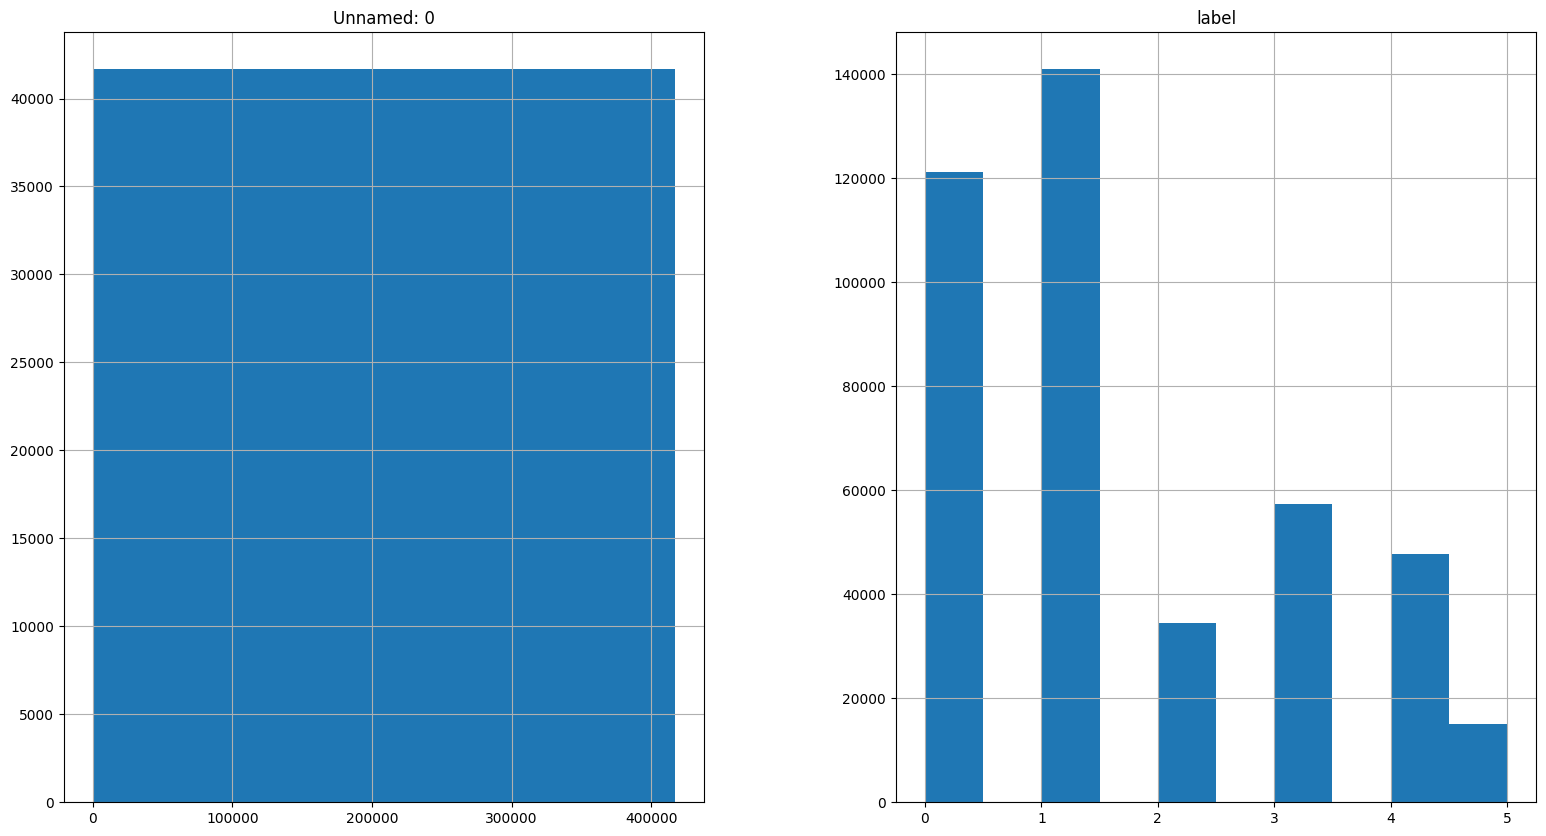

In [5]:
df.hist(figsize=(19,10));

#### Наблюдая график, можно заметить, что радостных и печальных сообщений больше всего

#### Этат блок требовался для сокращения дата сета, что бы меньше нагружать систему, и после того, как система заработает корректно вернуть полноценный дата сет

In [6]:
# np.random.seed(42)

# # Сокращаем до 100,000 записей случайным образом
# df_sampled = df.sample(n=100000, random_state=42)

# print(f"Было записей: {len(df)}")
# print(f"Стало записей: {len(df_sampled)}")
# print(f"Сокращение наФ {len(df) - len(df_sampled)} записей")
# print(f"Процент от оригинала: {len(df_sampled)/len(df)*100:.2f}%")

# # Перезаписываем df (или создаем новый)
# df = df_sampled.copy()

Было записей: 416809
Стало записей: 100000
Сокращение на 316809 записей
Процент от оригинала: 23.99%


In [6]:
df

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


### Переведем текст на русский язык

In [ ]:
# from deep_translator import GoogleTranslator
# from tqdm import tqdm
# import warnings
# warnings.filterwarnings('ignore')
# import time

In [ ]:
# def add_translation_column_inplace(df, text_column='text', target_lang='russian'):
#     """
#     Добавляет столбец 'translation' ПРЯМО в исходный датафрейм
#     """
#     start_time = time.time()
    
#     translator = GoogleTranslator(source='auto', target=target_lang)
#     translations = []
    
#     print(f"📊 Переводим {len(df)} текстов...")
    
#     for text in tqdm(df[text_column], desc="Перевод"):
#         try:
#             if pd.isna(text) or not isinstance(text, str):
#                 translations.append(text)
#             else:
#                 if len(text) > 5000:
#                     text = text[:5000]
#                 translations.append(translator.translate(text))
#         except:
#             translations.append(text)
#         time.sleep(0.05)
    
#     # Добавляем столбец ПРЯМО в исходный df
#     df['translation'] = translations
    
#     execution_time = time.time() - start_time
#     print(f"\n✅ Столбец 'translation' добавлен за {execution_time:.2f} сек")
    
#     return execution_time

In [ ]:
# df, execution_time = add_translation_column_inplace(df, text_column='text', target_lang='russian')

# print(f"✅ Столбцы в df: {list(df.columns)}")
# print(f"\nПример перевода:")
# print(f"Оригинал: {df['text'].iloc[0][:100]}...")
# print(f"Перевод:  {df['translation'].iloc[0][:100]}...")

In [418]:
from deep_translator import GoogleTranslator

In [419]:
def Translorot_df(text):
    return GoogleTranslator(source='en', target='ru').translate(text)
df['ru_text'] = df['text'].apply(Translorot_df)


KeyboardInterrupt



========================================

In [ ]:
import pandas as pd
from deep_translator import GoogleTranslator
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm # Библиотека для полоски прогресса

# 1. Твоя функция (лучше создавать объект транслятора один раз)
translator = GoogleTranslator(source='en', target='ru')

def translate_row(text):
    if not text or not isinstance(text, str):
        return ""
    try:
        return translator.translate(text)
    except Exception as e:
        return f"Error: {e}"

# 2. Выполнение в потоках
def parallel_translate(series, workers=10):
    with ThreadPoolExecutor(max_workers=workers) as executor:
        # map выполняет функцию для каждого элемента в потоках
        results = list(tqdm(executor.map(translate_row, series), total=len(series)))
    return results

# Запуск
df['text_russian'] = parallel_translate(df['text'], workers=50)

  0%|          | 452/100000 [00:49<2:17:53, 12.03it/s] 

In [ ]:
df

### Примеры текста с переводом

In [ ]:
from deep_translator import GoogleTranslator
import time

# Инициализируем переводчик
translator = GoogleTranslator(source='auto', target='russian')

print("="*70)
print("📊 ПРИМЕРЫ ТЕКСТОВ ПО LABEL (0-5) С ПЕРЕВОДОМ")
print("="*70)

for label_value in range(6):
    label_records = df[df['label'] == label_value]
    
    if len(label_records) > 0:
        record = label_records.iloc[0]
        original = record['text']
        
        print(f"\n🎯 LABEL {label_value} (всего: {len(label_records)})")
        print("-"*50)
        print(f"📝 Оригинал: {original[:150]}{'...' if len(str(original)) > 150 else ''}")
        
        try:
            translated = translator.translate(str(original)[:5000])
            print(f"🇷🇺 Перевод:  {translated[:150]}{'...' if len(translated) > 150 else ''}")
        except Exception as e:
            print(f"❌ Ошибка: {e}")
        
        time.sleep(0.5)
    else:
        print(f"\n❌ LABEL {label_value}: записей нет")

print("\n" + "="*70)

# Построим матрицу, для наших признаков

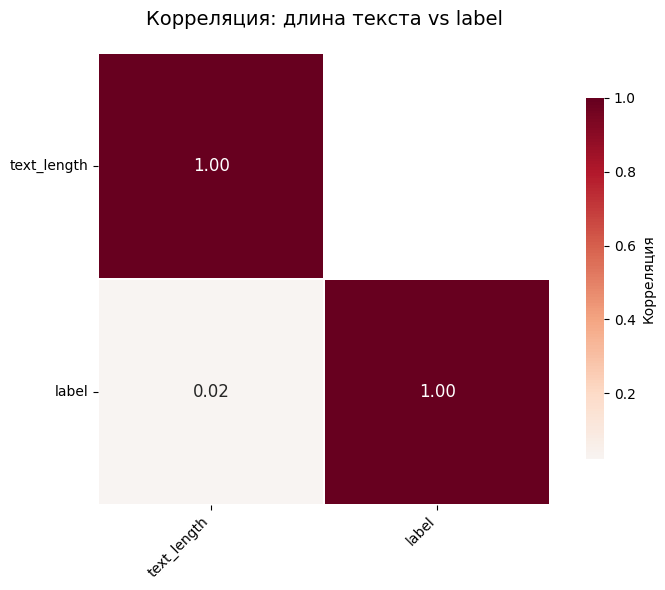


📊 Значения корреляции:
             text_length     label
text_length     1.000000  0.020976
label           0.020976  1.000000


In [7]:
def plot_2feature_heatmap(corr_matrix, title='Корреляционная матрица'):
    plt.figure(figsize=(8, 6))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
    
    # Тепловая карта
    sns.heatmap(corr_matrix, 
                annot=True,         
                linewidths=0.2,       
                fmt='.2f',            
                cmap='RdBu_r',          
                center=0,             
                square=True,          
                mask=mask,         
                cbar_kws={'shrink': 0.8, 'label': 'Корреляция'},
                annot_kws={'size': 12})
    
    plt.title(title, fontsize=14, pad=20)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Значения корреляции:")
    print(corr_matrix)

feature1 = df['text_length'] = df['text'].str.len()
feature2 = df['label']

corr_2features = pd.DataFrame({
    'text_length': feature1,
    'label': feature2
}).corr()

plot_2feature_heatmap(corr_2features, 'Корреляция: длина текста vs label')

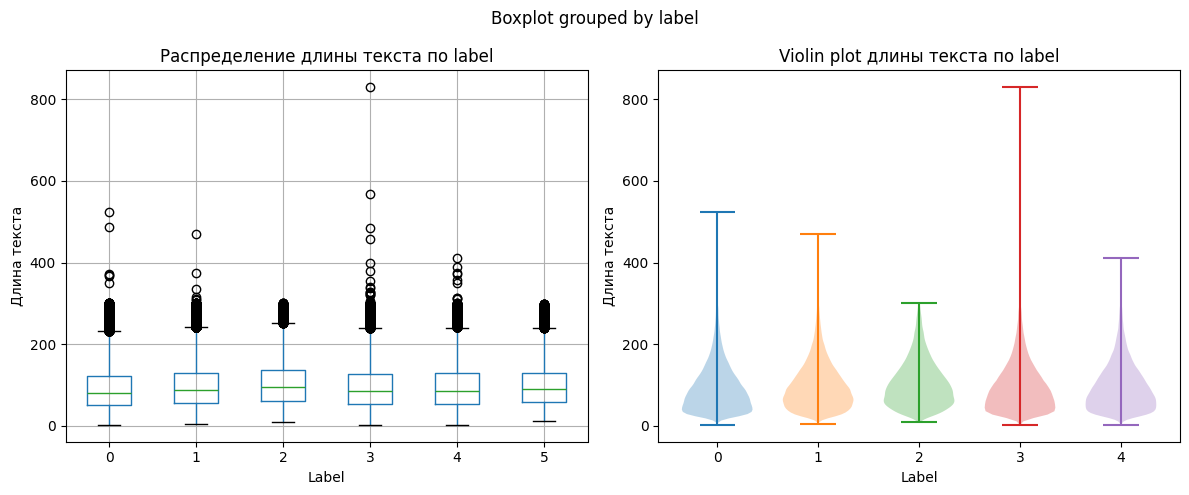

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df.boxplot(column='text_length', by='label', ax=axes[0])
axes[0].set_title('Распределение длины текста по label')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Длина текста')

for label in range(5):
    data = df[df['label'] == label]['text_length']
    axes[1].violinplot(data, positions=[label], widths=0.7)
axes[1].set_title('Violin plot длины текста по label')
axes[1].set_xlabel('Label')
axes[1].set_ylabel('Длина текста')
axes[1].set_xticks(range(5))

plt.tight_layout()
plt.show()

### Скошенное распределение

# Обучение модели классификации

In [21]:
pip install xgboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/101.7 MB 2.4 MB/s eta 0:00:43
   ---------------------------------------- 0.8/101.7 MB 1.6 MB/s eta 0:01:04
   ---------------------------------------- 0.8/101.7 MB 1.6 MB/s eta 0:01:04
    --------------------------------------- 1.3/101.7 MB 1.3 MB/s eta 0:01:17
    --------------------------------------- 1.6/101.7 MB 1.4 MB/s eta 0:01:15
    --------------------------------------- 1.8/101.7 MB 1.3 MB/s eta 0:01:19
    --------------------------------------- 2.4/101.7 MB 1.4 MB/s eta 0:01:14
   - -------------------------------------- 2.6/101.7 MB 1.4 MB/s eta 0:01:12
   - -------------------------------------- 2.9/101.7 MB 1.4 MB/s eta 0:01:09
   - -------------------------------------- 2.9/101.7 MB 1.4 MB/s eta 0:01:09
   - --

In [19]:
pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.0 MB 2.4 MB/s eta 0:00:04
   ------ --------------------------------- 1.3/8.0 MB 2.4 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.0 MB 2.1 MB/s eta 0:00:04
   --------- ------------------------------ 1.8/8.0 MB 2.0 MB/s eta 0:00:04
   ----------- ---------------------------- 2.4/8.0 MB 2.1 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.0 MB 2.3 MB/s eta 0:00:03
   ------------------ --------------------- 3.7/8.0 MB 2.3 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.0 MB 2.4 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.0 MB 2.4 MB/s eta 0:00:02
   -------------------------- ------------- 5.2/8.0 MB 2.4 MB/s eta 0:00:02
   ---------------------------- -

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import warnings

In [23]:
df

,Unnamed: 0,text,label,text_length
0,0,i just feel really helpless and heavy hearted,4,45
1,1,ive enjoyed being able to slouch about relax a...,0,234
2,2,i gave up my internship with the dmrg and am f...,4,63
3,3,i dont know i feel so lost,0,26
4,4,i am a kindergarten teacher and i am thoroughl...,4,222
...,...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2,132
416805,416805,i began to realize that when i was feeling agi...,3,111
416806,416806,i feel very curious be why previous early dawn...,5,90
416807,416807,i feel that becuase of the tyranical nature of...,3,222


In [24]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['label'].values

In [25]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2392319 stored elements and shape (416809, 1000)>

In [26]:
y

array([4, 0, 4, ..., 5, 3, 5])

In [27]:
print(f"📊 Размер матрицы признаков: {X.shape}")
print(f"🎯 Распределение label:")
label_counts = df['label'].value_counts().sort_index()
for label in range(6):
    print(f"   Label {label}: {label_counts.get(label, 0)} записей")

📊 Размер матрицы признаков: (416809, 1000)
🎯 Распределение label:
   Label 0: 121187 записей
   Label 1: 141067 записей
   Label 2: 34554 записей
   Label 3: 57317 записей
   Label 4: 47712 записей
   Label 5: 14972 записей


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [29]:
model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    objective='multi:softprob',  # для мультикласса
    num_class=5,  # 5 классов эмоций
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

model.fit(X_train, y_train)

# Предсказания
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [30]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91     24238
           1       0.85      0.89      0.87     28214
           2       0.73      0.88      0.80      6911
           3       0.89      0.82      0.86     11463
           4       0.89      0.76      0.82      9542
           5       0.69      0.92      0.79      2994

    accuracy                           0.86     83362
   macro avg       0.83      0.86      0.84     83362
weighted avg       0.87      0.86      0.87     83362



#### Можем наблюдать, что модель  XGBoost, справилась хорошо
- Среднее Арифметическое число по f1-score = 84.16% (0.84)
- XGBoost - Используется для решения задач классификации

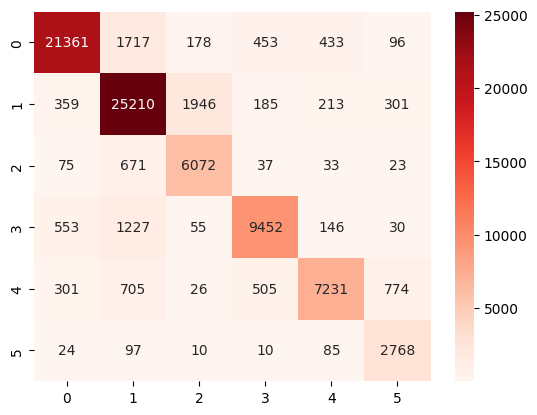

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.show()

# Обучение нейронной модели

In [32]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1915003 stored elements and shape (333447, 1000)>

In [33]:
np.min(y_train)

np.int64(0)

In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import InputLayer, Dense
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
    InputLayer(shape=(1000,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(6, activation='softmax')
])

# class_weight = {0: 1.0, 1: 9.0}

model.compile(optimizer='adam', 
              # loss='binary_crossentropy', 
              loss=tf.keras.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy'])

In [ ]:
# tf.keras.losses.categorical_crossentropy

In [35]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        64,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,342 (259.15 KB)

 Trainable params: 66,342 (259.15 KB)

 Non-trainable params: 0 (0.00 B)

None


In [36]:
# history = model.fit(X_train, y_train, 
#                     epochs=50, 
#                     # batch_size=64, 
#                     validation_split=0.1,)
#                     # class_weight=class_weight,)
model.fit(X_train, y_train, 
                    epochs=20)
                    # batch_size=64, 
                    # class_weight=class_weight,)

Epoch 1/20
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.8591 - loss: 0.3493
Epoch 2/20
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 92s 5ms/step - accuracy: 0.8736 - loss: 0.2879
Epoch 3/20
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 79s 5ms/step - accuracy: 0.8770 - loss: 0.2772
Epoch 4/20
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 67s 4ms/step - accuracy: 0.8795 - loss: 0.2690
Epoch 5/20
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.8819 - loss: 0.2617
Epoch 6/20
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 67s 6ms/step - accuracy: 0.8846 - loss: 0.2549
Epoch 7/20
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 70s 4ms/step - accuracy: 0.8867 - loss: 0.2488
Epoch 8/20
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - accuracy: 0.8891 - loss: 0.2429
Epoch 9/20
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - accuracy: 0.8912 - loss: 0.2378
Epoch 10/20
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.8928 - loss: 0.2324
Epoch 11/20
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.8956 - loss: 0.22

In [37]:
predictions = model.predict(X_test)

2606/2606 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step


In [38]:
predictions

array([[4.9544586e-04, 4.3872711e-01, 5.6075430e-01, 1.9127709e-05,
        3.7871725e-06, 3.0362790e-07],
       [2.0597383e-06, 1.5209962e-03, 9.9753511e-01, 4.5175201e-04,
        3.1743875e-05, 4.5832095e-04],
       [1.6954292e-08, 1.0576909e-05, 1.8563069e-05, 1.4429488e-08,
        9.9997067e-01, 1.5640171e-07],
       ...,
       [9.9984920e-01, 3.2661038e-07, 1.0098045e-04, 3.4050932e-05,
        1.5464573e-05, 1.2877313e-11],
       [1.1090724e-02, 1.3808483e-07, 5.7465199e-06, 1.4926388e-09,
        9.8890334e-01, 4.6594702e-15],
       [3.3329474e-05, 9.9981338e-01, 2.5293184e-08, 1.5325565e-04,
        1.4988890e-08, 9.7638673e-19]], dtype=float32)

In [39]:
y_pred = np.argmax(predictions, axis=1)

In [40]:
y_pred

array([2, 2, 4, ..., 0, 4, 1])

In [41]:
print(classification_report(y_test, y_pred,
                           labels=[0, 1, 2, 3, 4, 5],  # все 5 классов
                           target_names=['Гнев', 'Любовь', 'Радость', 'Печаль', 'Страх', 'Удивление']))

              precision    recall  f1-score   support

        Гнев       0.90      0.91      0.90     24238
      Любовь       0.88      0.89      0.89     28214
     Радость       0.76      0.75      0.75      6911
      Печаль       0.87      0.81      0.84     11463
       Страх       0.82      0.79      0.80      9542
   Удивление       0.70      0.80      0.74      2994

    accuracy                           0.86     83362
   macro avg       0.82      0.83      0.82     83362
weighted avg       0.86      0.86      0.86     83362



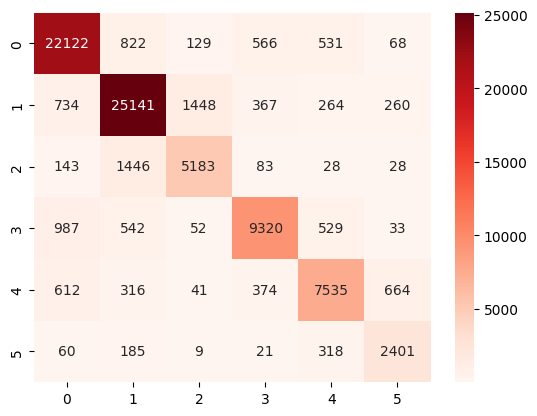

In [42]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.show()

# Вывод по проделанной работе: 

Модель классификации показала себя очень хорошо, средний показатель верного ответа у модели: 0.84

Модель нейронных ситей так же показала себя хорошо, средний показатель верного ответа: 0.82

Дата сет составил: 416809 rows × 3 columns, в таблице 2 признака
 * 1-й признак это текст, который описавает эмоцию
 * 2-й признак это числовое значение, которое демонстрирует эмоцию текста

Был выбран дата сет, где содержится текст пользователей, и отображает их эмоцию в тексте

На мой взгяд, обе модели показатели себя отлично, разница между нейронными сетями и моделью составляет 0.02, что не является большим разравом 

* В принципе нейронная модель сильна тем, что она может распознать паттерны или скрытые зависимости в датасете, что сильно помогает в обучении и тем самым улучшая её эффективность. В этом датасете, нейронная модель найти таких паттернов не смогла.

* Модель лучше использовать в случаях, когда нужно отнести объект к одному из предопределённых классов на основе его признаков.


* URL in dataset: https://www.kaggle.com/datasets/nelgiriyewithana/emotions
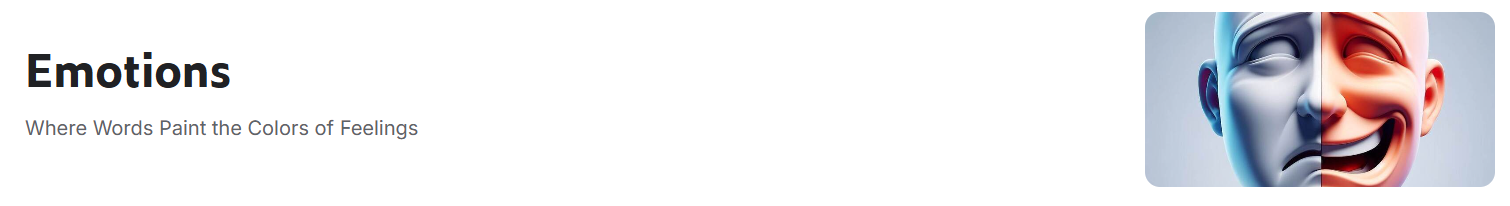

# Модель: RandomForestClassifier

In [44]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['label'].values

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomfc = RandomForestClassifier(n_estimators=100)
randomfc.fit(X_train, y_train)

In [ ]:
y_pred = randomfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))